# Example: Surrogate Model

In this example, we train a surrogate model via the `bayesvalidrox` package. We aim at training a Polynomial Chaos Expansion to a simple analytical function. 
The PCE representation of the computational model $M$ provides the dependence of this model on the uncertain model's parameters $\mathbf{\theta}$ using projection onto an orthonormal polynomial basis. It could be also seen as a linear regression that includes linear combinations of a fixed set of nonlinear functions with respect to the input variables, known as polynomial basis function

\begin{equation}
\label{eq:PCE_Trunc}
    M(x,y,z,t, \mathbf{\theta}) \approx \sum_{\mathbf{\alpha} \in \mathcal{A} } c_{\mathbf{\alpha}} (x,y,z,t) \Psi_{\mathbf{\alpha}}(\mathbf{\theta}) \, .
\end{equation}

Here, $x,y,z,t$ are the spatial and temporal components of the quantity of interest, $\mathbf{\theta}$ is the vector of the $N$ uncertain parameters of model $M$, $c_{\mathbf{\alpha}}(x,y,z,t)  \in \mathbb{R}$ are the corresponding expansion coefficients that are functions of space and time, and $\Psi_{\mathbf{\alpha}}(\mathbf{\theta})$ represents multivariate polynomials orthogonal with respect to a multi-index $\mathbf{\alpha}$. 

The latter represents the combinatoric information how to enumerate all possible products of $N$ individual univariate basis functions with respect to the total degree of expansions less or equal to polynomial degree $d$:

\begin{equation}
\label{eq:truncation}
\begin{split}
    \mathcal{A}^{N, d} = \{ \alpha \in \mathbb{N}^{N} \ : \ |\alpha|\leq d\} \, , \qquad
    \text{card} \ \mathcal{A}^{N, d} \equiv P = \binom{N+d}{d}.
\end{split}
\end{equation}

The multivariate polynomials $\Psi_{\alpha}(\mathbf{\theta})$ are comprised of the tensor product of univariate polynomials

\begin{equation}
\label{eq:Psi}
    \Psi_{\alpha}(\mathbf{\theta}_k) :=  \prod_{i=1}^{N_k} \psi_{\alpha_i}^{(i)}(\mathbf{\theta}_{k,i}) \, ,
\end{equation}

where the univariate orthonormal polynomials $\psi_{\alpha_i}^{(i)}(\mathbf{\theta}_{i})$ must satisfy 

\begin{equation}
\label{eq:univPsi}
    \langle \psi_j^{(i)}(\mathbf{\theta}_{k,i}), \psi_l^{(i)}(\mathbf{\theta}_{k,i}) \rangle := \int_{\Theta_{k,i}} \psi_j^{(i)}(\mathbf{\theta}_{k,i}) \psi_l^{(i)}(\mathbf{\theta}_{k,i}) f_{\Theta_{k,i}}  (\mathbf{\theta}_{k,i})d \mathbf{\theta}_{k,i} = \delta_{j l} \, .
\end{equation}

Here, $i$ represents the input variable with respect to which the polynomials are orthogonal as well as the corresponding polynomial family, $j$ and $l$ are the corresponding polynomial degree, $f_{\Theta_{i}}(\mathbf{\theta}_{i})$ is the $i$th-input marginal distribution and $\delta_{j l}$ is the Kronecker delta.
We use an arbitrary polynomial chaos expansion (aPCE), introduced by [Oladyshkin & Nowak (2012)](https://www.sciencedirect.com/science/article/pii/S0951832012000853?casa_token=pbisUgY4niQAAAAA:8WsqMi1mCyfUIJ3GnFGdv6FXFA6a4g8MB75kjGGdEvocV64cd4E8LxcSh8_fwZTeI2ONlUalq_8), that can operate with probability measures that may be implicitly and incompletely defined via their statistical moments. Using aPCE, one can build the multivariate orthonormal polynomials even in the absence of the exact probability density function $f_{\Theta}(\theta)$

In this tutorial, we use an extension of aPCE as Bayesian sparse arbitrary polynomial chaos (BsaPCE) representation. This method computes the coefficients $c_\alpha$ in a Bayesian setting via a so-called Bayesian sparse learning approach, introduced by [Tipping (2001)](https://www.jmlr.org/papers/volume1/tipping01a/tipping01a.pdf?ref=https://githubhelp.com).

The posterior distribution of the expansion coefficients, conditioned on the model responses $\mathrm{\mathbf{Y}}$ resulting from the training sets $\mathbf{X}$, is given by the combination of a Gaussian likelihood and a Gaussian prior distribution over the unknown expansion coefficients $\mathbf{c}$ according to Bayes' rule. Then, the posterior of the expansion coefficients given the model responses $\mathrm{\mathbf{Y}}$ and values of hyper-parameters $\mathbf{\alpha}$ and $\beta$ describing the Gauss process, can take the following form

\begin{equation}
\label{eq:PCE_Posterior}
    p(\mathrm{\mathbf{c}}|\mathbf{Y},\mathbf{\alpha}, \beta) = \frac{p(\mathrm{\mathbf{Y}}|\mathbf{X},\mathbf{c}, \beta) p(\mathbf{c}|\mathbf{\alpha})}{p(\mathrm{\mathbf{Y}}| \mathbf{X}, \mathbf{\alpha} , \beta)},
\end{equation}

which is also Gaussian defined by $\mathcal{N}( \mathbf{c}| \mathbf{\mu}, \mathbf{\Sigma})$ with

\begin{equation}
\label{eq:PCE_Posterior_moments}
    \mathbf{\mu} = \beta \mathbf{\Sigma} \mathbf{\Psi}^{\top} \mathrm{\mathbf{Y}} \, , \qquad
    \mathbf{\Sigma} = \left(\mathbf{A}+ \mathbf{\Psi}^{\top} \beta \mathbf{\Psi} \right)^{-1} \, .
\end{equation}

Here, $\mathbf{\Psi}$ is the design matrix of size $E \times N$ with elements $\Psi_{ni}=\psi_i(x_n)$, where $E$ represents the number of model evaluations using the training samples, and $\mathbf{A}=\mathrm{diag}(\alpha_i)$. The values of $\mathbf{\alpha}$ and $\beta$ can be determined via type-II maximum likelihood [Berger (2013)](https://books.google.com/books?hl=en&lr=&id=1CDaBwAAQBAJ&oi=fnd&pg=PA1&dq=Statistical+decision+theory+and+Bayesian+analysis.++berger+2013&ots=LMulrdTL3O&sig=xMTVRCVf5scWBLQi98BgUie5d-M)

## Problem description: Analytical function

This test shows a surrogate-assisted Bayesian calibration of a time dependent non-linear analytical function of ten ($n=10$) uncertain parameters $\omega=\{\omega_1, ..., \omega_n\}$, which reads as:

\begin{equation}
\mathbf{y}(\boldsymbol{\omega}, t)=\left(\omega_{1}^{2}+\omega_{2}-1\right)^{2}+\omega_{1}^{2}+0.1 \omega_{1} \exp \left(\omega_{2}\right)-2 \omega_{1} \sqrt{0.5 t}+1+\sum_{i=2}^{n} \frac{\omega_{i}^{3}}{i}
\end{equation}

where the prior parameter distribution $p(\omega)$ is considered to be independent and uniform with $\omega_i \sim \mathcal{U} (-5, 5)$.

## Import necessary libraries

In [1]:
import sys
import numpy as np
import pandas as pd
import joblib
import matplotlib
import emcee
from IPython.display import IFrame

## Define the model with PyLinkForwardModel

We use the`PyLinkForwardModel`object for this purpose. Fistly, we are going to import the `bayesvalidrox` package and then, we instantiate the `PyLinkForwardModel` object.

In [2]:
from bayesvalidrox import PyLinkForwardModel
model = PyLinkForwardModel()

Next, we will pass the `link_type`, `name` and `py_file` variables to the `Model` object. Since the analytical function is implmented as a python function in a separate file, we only need to pass it's name (without `.py` extension) to the object variable `py_file`. Note that the function name in the python script should match that of the script. For models implemented as a separate python file, the `link_type` is `Function` to be given as a string. The `name` variable takes any user defined string.

In [3]:
model.link_type = 'Function'
model.py_file = 'analytical_function'
model.name = 'AnalyticFunc'

The model output name is defined as follows:

In [4]:
model.Output.names = ['Z'] # As a list of strings

**Bonus**: For this example, we have a Monte-Carlo reference solution for the first moements (mean and standard deviation) of the analytical function. The numpy (`*.npy`) files can be found in the `data\` directory. We will discuss the first two moments with our estimate moments using the surrogate model. These values can be passed in a form of a dictionary to the object variable `mc_reference`.

In [5]:
model.mc_reference = {}
model.mc_reference['Time [s]'] = np.arange(0, 10, 1.) / 9
model.mc_reference['mean'] = np.load(f"data/mean_2.npy")
model.mc_reference['std'] = np.load(f"data/std_2.npy")

## Define probablistic input model

Now, we define the distribution of the model inputs. `bayesvalidrox` accepts the definition in two ways: by defining the distribution directly or by passing available data. The latter is handy, when little information is available on the parameters or they do not follow any typical distributions. We will use the second option and read the input parameters form a numpy file in the `data/` directory.

In [11]:
# Import and instantiate the input object
from bayesvalidrox import Input

# Option I: Define distribution directy with their name, type and parameters 
inputs = Input()

# First parameter
inputs.add_marginals()
inputs.marginals[0].name = '$X_1$'
inputs.marginals[0].dist_type = 'unif'
inputs.marginals[0].parameters =  [-5, 5]

# Second parameter
inputs.add_marginals()
inputs.marginals[1].name = '$X_2$'
inputs.marginals[1].dist_type = 'unif'
inputs.marginals[1].parameters =  [-5, 5]

# ----------------------------------------------------------------------------

# Option II: Pass available data for input parameters and  use shorthand
inputs = Input()
inputParams = np.load('data/InputParameters_2.npy')

inputs.add_marginals(name = '$X_1$',input_data = inputParams[:, 0])
inputs.add_marginals(name = '$X_2$',input_data = inputParams[:, 1])

## Define surrogate (meta) model

In this example, we use a Polynomial Chaos Expansion (PCE) as our meta model. Like before, we need to import the `PCE` class from `bayesvalidrox` package and instantiate a PCE object. This object accepts the input object (`Input`) as an argument.

In [12]:
from bayesvalidrox import PCE
meta_model = PCE(inputs)

There are no estimations of surrogate uncertainty available for the chosen regression options. This might lead to issues in later steps.


Let us define now the meta model type, the regression type, degree of the polynomials and the trunction norm `q_norm` which lies between 0 and 1. This parameter defines hyperbolic truncation scheme. As for `meta_model_type`, there are two PCE implementations available in `bayesvalidrox`, namely generalized PCE (`PCE`) [Xiu & Karniadakis (2002)](https://doi.org/10.1137/S1064827501387826) or its arbitrary extension (`aPCE`) [Oladyshkin & Nowak (2012)](https://doi.org/10.1016/j.ress.2012.05.002).

In [13]:
# Select your metamodel method, either PCE or aPCE
meta_model.meta_model_type = 'aPCE'

# Select the regression method for calculation of the PCE coefficients:
# 1)OLS: Ordinary Least Square  2)BRR: Bayesian Ridge Regression
# 3)LARS: Least angle regression  4)ARD: Bayesian ARD Regression
# 5)FastARD: Fast Bayesian ARD Regression
# 6)VBL: Variational Bayesian Learning
# 7)EBL: Emperical Bayesian Learning
meta_model.pce_reg_method = 'FastARD'


# Specify the polynomial degree to be compared by the adaptive algorithm:
# The degree with the lowest Leave-One-Out cross-validation (LOO)
# error (or the highest score=1-LOO)estimator is chosen as the final
# metamodel. pce_deg accepts degree as a scalar or a range.
meta_model.pce_deg = np.arange(9)

# Hyperbolic truncation scheme 0<q<1 (default=1)
meta_model.pce_q_norm = 0.75

After defining the metamodel type, we need to define the so-called experimental design (ExpDesign). ExpDesign basically provides instruction on how to sample the input parameter space.

In [14]:
from bayesvalidrox import ExpDesigns
exp_design = ExpDesigns(inputs)

# Number of initial (static) samples
exp_design.n_init_samples = 100

# Sampling methods
# 1) random 2) latin_hypercube 3) sobol 4) halton 5) hammersley 6) korobov
# 7) chebyshev(FT) 8) grid(FT) 9) nested_grid(FT) 10)user
exp_design.sampling_method = 'latin_hypercube'

Training is done by giving the model, experimental design and the surrogate model to an engine, which performs the training for us.
The engine is of class `Engine` and contains the surrogate, model and experimental design objects.

In [15]:
from bayesvalidrox import Engine

engine = Engine(meta_model, model, exp_design)

Now, we can start training the surrogate (meta-) model by starting the engine and using the method `train_normal`.
The engine obtains the training samples from the experimental design using the sampling strategy we set, runs the model on these samples and trains the surrogate on the results.

In [16]:
engine.train_normal()


 Now the forward model needs to be run!



Computing orth. polynomial coeffs: 100%|##########| 2/2 [00:00<00:00,  2.43it/s]


We can obtain the trained surrogate from the engine as `engine.MetaModel`.
Since we will need the engine class for postprocessing and inference, we will save it at this point as a `pkl` object. In this way we can easily read it in to avoid retraining the surrogate.

In [17]:
with open(f'PCEengine_{model.name}.pkl', 'wb') as output:
    joblib.dump(engine, output, 2)

## Post-processing

As before, we need to import the `PostProcessing` module of `bayesvalidrox` and instantiate it. Bear in mind that it accepts the Engine object `engine` as the only argument.

In [18]:
from bayesvalidrox import PostProcessing
post = PostProcessing(engine)

### Moment comparison

Since the reference moments obtained from a Monte-Carlo simulation is available, we only need to call the `plot_moments` method from the PostProcessing object. This method generates a plot and stores it in `Outputs_PostProcessing_calib` directory.

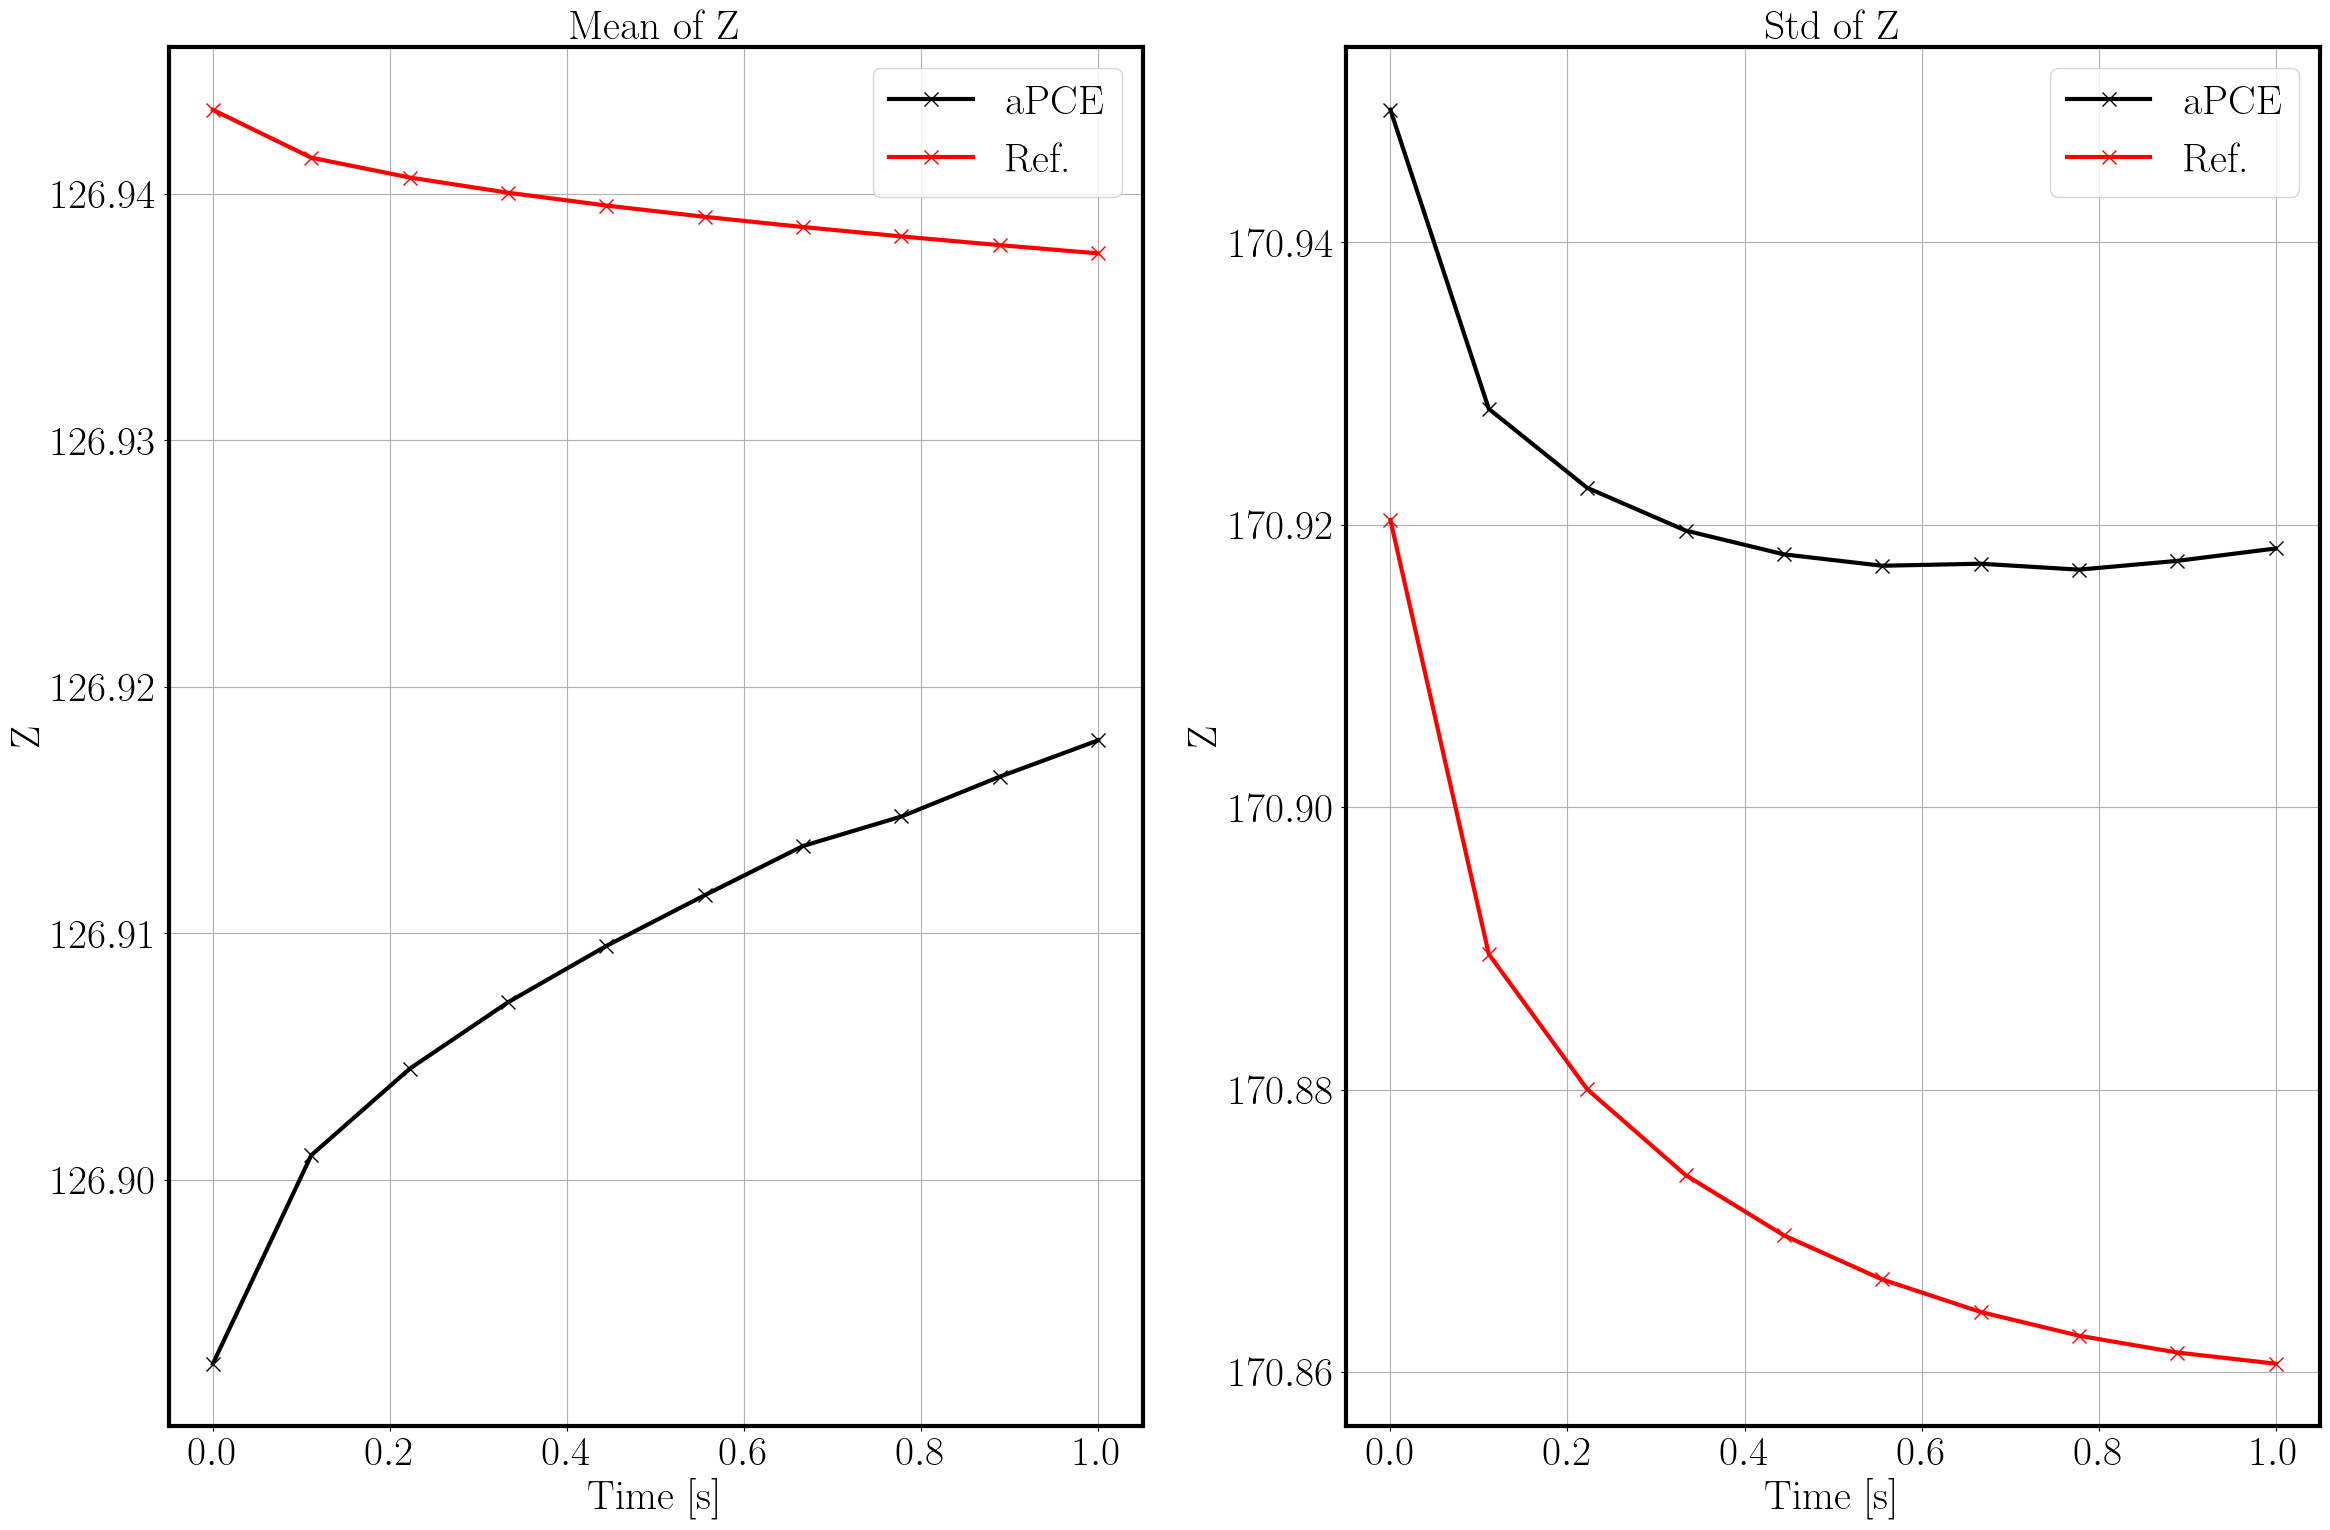

In [19]:
# Compute the moments and compare with the Monte-Carlo reference
post.plot_moments()
# Show the pdf
IFrame("./Outputs_PostProcessing_calib/Mean_Std_PCE.pdf", width=900, height=600)

### Validation of the metamodel

Let us first visually compare the results of the metamodel and the original model, i.e. `Analytical Function` for 3 randomly drawn samples for the prior parameter distribution. 

In [20]:
# Plot to check validation visually.
post.valid_metamodel(n_samples=3)
# Show the pdf
IFrame("./Outputs_PostProcessing_calib/Model_vs_PCEModel.pdf", width=900, height=600)

Running forward model valid: 100%|██████████| 3/3 [00:03<00:00,  1.31s/it]


Another way to check the accuracy of the meta model is to use the `accuracyCheckMetaModel` method to show the Root Mean Square Error and the validation error. 

In [21]:
# Compute and print RMSE error
post.check_accuracy(n_samples=200)

Running forward model valid: 100%|██████████| 200/200 [00:11<00:00, 17.43it/s]


>>>>> Errors of Z <<<<<

Index  |  RMSE   |  Validation Error
-----------------------------------
1  |  4.769e-01  |  9.379e-06
2  |  4.770e-01  |  9.398e-06
3  |  4.772e-01  |  9.410e-06
4  |  4.775e-01  |  9.423e-06
5  |  4.780e-01  |  9.446e-06
6  |  4.795e-01  |  9.510e-06
7  |  4.782e-01  |  9.461e-06
8  |  4.736e-01  |  9.278e-06
9  |  4.750e-01  |  9.337e-06
10  |  4.755e-01  |  9.358e-06


### Global sensitivity analysis with Sobol indices

Here, we analyze how the variability of the model response quantity (`Z`) is affected by the variability of each input variable or combinations thereof. Here, we use the so-called Sobol indices ([Sobol original paper](https://mae.ufl.edu/haftka/eoed/protected/Sobol%20Original%20Paper.pdf)), derived from a variance decomposition of model outputs in terms of contributions of each input parameter or combinations thereof. 
Using Sobol decomposition, one can describe the total variance of the model in terms of the sum of the summands' variances. Once the PC representation of the model is available, the expansion coefficients are simply gathered according to the dependency of each basis polynomial, square-summed and normalized

\begin{equation}
\label{eq:pce-sobol-1st}
\begin{array}{l}
S_{i_{1}, \ldots, i_{s}}=\frac{\sum\limits_{j=1}^{M} \chi_{j} c_{j}^{2}}{\sum\limits_{j=1}^{M} c_{j}^{2}} \, ,\qquad
\chi_{j}=\left\{\begin{array}{ll}
1, & \text { if } \alpha_{j}^{k}>0, \quad \forall j \in\left(i_{1}, \ldots, i_{s}\right) \\[0.5em]
0, & \text { if } \alpha_{j}^{k}=0, \quad \exists j \in\left(i_{1}, \ldots, i_{s}\right)
\end{array}\right\} \, .
\end{array}
\end{equation}

Here,  $S_{i_{1}, \ldots, i_{s}}$ is the Sobol index that indicates what fraction of total variance of the response quantity can be traced back to the joint contributions of the parameters $\theta_{i_{1}}, \ldots, \theta_{i_{s}}.$ The index selection operator $\chi_{j}$ indicates where the chosen parameters $\theta$ numbered as $i_{1}, \ldots, i_{s}$ (i.e., $\left.\theta_{i_{1}}, \ldots, \theta_{i_{s}}\right)$ have concurrent contributions to the variance within the overall expansion. Simply put, it selects all polynomial terms with the specified combination $i_{1}, \ldots, i_{s}$ of model parameters.

A complementing measure for sensitivity analysis is the Sobol Total Index. It expresses the total contribution to the variance of model output due to the uncertainty of an individual parameter $\theta_j$ in all cross-combinations with other parameters

\begin{equation}
\label{eq:pce-sobol-total}
S_{j}^{T}=\sum_{\left\{i_{1}, \ldots, i_{s}\right\} \supset j} S_{i_{1}, \ldots, i_{s}},
\end{equation}

where $S_{j}^{T}$ is simply a summation of all Sobol indices in which the variable $\theta_j$ appears as univariate as well as joint influences.
The Total Sobol indices sum to one, if input variables are independent. When dealing with correlated variables, however, this is not the case.

To perform the sensitivity analysis with `bayesvalidrox` package, we need to call the function `sobol_indices` of the `PostProcessing` object. This returns two dictionaries containing the single sobol indices and the total ones. Moreover, it plots the Total Sobol Indices and stores the plots in `pdf` format in `Outputs_PostProcessing_calib` directory.
This function can only be called for PCE-type metamodels

In [22]:
# Plot the sobol indices
sobol_cell, total_sobol = post.sobol_indices()
# Show the pdf
IFrame("./Outputs_PostProcessing_calib/Sobol_indices.pdf", width=900, height=600)

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>